In [12]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('/cluster/tufts/hugheslab/prath01/projects/time_series_prediction/src/')
from feature_transformation import parse_feature_cols
import json
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler
import time
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error, make_scorer
from autograd.scipy.special import expit as ag_expit
import lightgbm as lgb

In [2]:
# eicu_data_dir = '/cluster/tufts/hugheslab/prath01/projects/time_series_prediction/datasets/eicu/v20210610/split-by=subject_id/collapsed_features_dynamic_input_output/classifier_train_test_split_dir/'
eicu_data_dir = '/cluster/tufts/hugheslab/prath01/projects/time_series_prediction/datasets/mimic3_inhospital_mortality/v20201207/split-by=subject_id/collapsed_features_dynamic_input_output/classifier_train_test_split_dir/'


eicu_data_csv = os.path.join(eicu_data_dir, 'x_train.csv')
eicu_df = pd.read_csv(eicu_data_csv)



eicu_dict_file = os.path.join(eicu_data_dir, 'x_dict.json')
eicu_data_dict = json.load(open(eicu_dict_file))
feature_cols = parse_feature_cols(eicu_data_dict['schema'])

y_train_csv = os.path.join(eicu_data_dir, 'y_train.csv')
y_train_df = pd.read_csv(y_train_csv)

x_train = eicu_df[feature_cols].values
y_train = y_train_df['mort_hosp'].values

## lightgbm feature importance

In [14]:
clf = lgb.LGBMClassifier(class_weight='balanced', max_bin=255, n_estimators=500,
                         importance_type='gain',learning_rate=0.1,feature_fraction = 0.1)

kf = StratifiedKFold(n_splits=2, shuffle=True)
predicts = []
for train_index, test_index in kf.split(x_train, y_train):
    print("###")
    X_tr, X_val = x_train[train_index], x_train[test_index]
    y_tr, y_val = y_train[train_index], y_train[test_index]
    clf.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], 
            early_stopping_rounds=20, verbose=10)
    predicts.append(clf.predict(X_tr))

###


/cluster/tufts/hugheslab/miniconda2/envs/lgbm/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/cluster/tufts/hugheslab/miniconda2/envs/lgbm/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.49402
[20]	valid_0's binary_logloss: 0.410405
[30]	valid_0's binary_logloss: 0.36473
[40]	valid_0's binary_logloss: 0.331975
[50]	valid_0's binary_logloss: 0.308496
[60]	valid_0's binary_logloss: 0.288989
[70]	valid_0's binary_logloss: 0.272998
[80]	valid_0's binary_logloss: 0.258366
[90]	valid_0's binary_logloss: 0.246607
[100]	valid_0's binary_logloss: 0.235524
[110]	valid_0's binary_logloss: 0.225759
[120]	valid_0's binary_logloss: 0.216685
[130]	valid_0's binary_logloss: 0.208136
[140]	valid_0's binary_logloss: 0.200536
[150]	valid_0's binary_logloss: 0.193271
[160]	valid_0's binary_logloss: 0.186853
[170]	valid_0's binary_logloss: 0.181071
[180]	valid_0's binary_logloss: 0.174764
[190]	valid_0's binary_logloss: 0.169552
[200]	valid_0's binary_logloss: 0.164989
[210]	valid_0's binary_logloss: 0.160264
[220]	valid_0's binary_logloss: 0.15581
[230]	valid_0's binary_logloss: 0.151738
[240]	valid_0's binary_logloss: 0.147986
[250]	valid_0's binary_loglo

/cluster/tufts/hugheslab/miniconda2/envs/lgbm/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/cluster/tufts/hugheslab/miniconda2/envs/lgbm/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1
[10]	valid_0's binary_logloss: 0.495015
[20]	valid_0's binary_logloss: 0.41248
[30]	valid_0's binary_logloss: 0.365263
[40]	valid_0's binary_logloss: 0.332785
[50]	valid_0's binary_logloss: 0.308654
[60]	valid_0's binary_logloss: 0.289461
[70]	valid_0's binary_logloss: 0.273687
[80]	valid_0's binary_logloss: 0.260518
[90]	valid_0's binary_logloss: 0.247728
[100]	valid_0's binary_logloss: 0.236977
[110]	valid_0's binary_logloss: 0.226925
[120]	valid_0's binary_logloss: 0.21769
[130]	valid_0's binary_logloss: 0.208973
[140]	valid_0's binary_logloss: 0.201507
[150]	valid_0's binary_logloss: 0.194075
[160]	valid_0's binary_logloss: 0.18757
[170]	valid_0's binary_logloss: 0.181943
[180]	valid_0's binary_logloss: 0.176117
[190]	valid_0's binary_logloss: 0.171097
[200]	valid_0's binary_logloss: 0.166164
[210]	valid_0's binary_logloss: 0.161007
[220]	valid_0's binary_logl

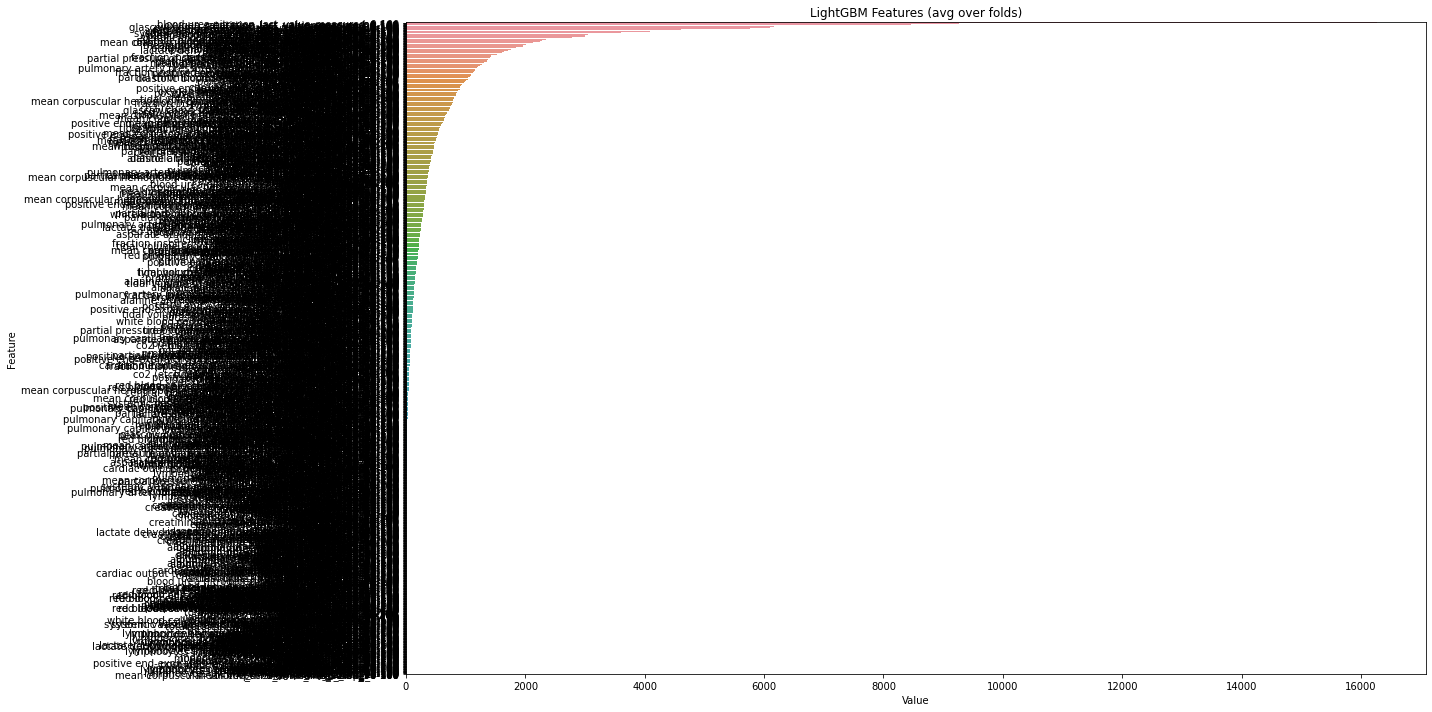

In [15]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,feature_cols)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
# plt.savefig('lgbm_importances-01.png')

In [17]:
feature_imp.sort_values(by="Value", ascending=False)

,Value,Feature
1695,16269.746517,blood urea nitrogen_last_value_measured_0-100
1694,13949.246614,anion gap_max_0-100
1693,9268.043093,creatinine_last_value_measured_0-100
1692,9156.988206,oxygen saturation_last_value_measured_0-100
1691,9071.680628,age_count_90-100
...,...,...
309,0.000000,lymphocytes_std_90-100
310,0.000000,magnesium_count_90-100
311,0.000000,mean corpuscular volume_count_90-100
312,0.000000,mean corpuscular volume_time_since_measured_90...


In [5]:
np.flatnonzero(np.array(feature_cols)=='anion gap_max_0-100')

array([116])

## LASSO feature importance

In [3]:
'''
step_list = list()

scaler_x = StandardScaler()
step_list.append(('standardize', scaler_x))
step_list.append(('regressor', Lasso(max_iter=100000, tol=0.001, selection='cyclic')))
scoring = 'neg_mean_absolute_error'

gridsearchvalues__alpha=np.array([1e-5])
alpha_grid = np.asarray(gridsearchvalues__alpha, dtype=np.float64)
param_grid = [{'regressor__alpha': alpha_grid}]

prediction_pipeline = Pipeline(step_list)
regressor_with_grid_search = GridSearchCV(
        prediction_pipeline, param_grid,
        scoring=scoring,
        cv=2,
        return_train_score=True,
        iid=False,
        refit=True)

prng = np.random.RandomState(0)
shuffle_ids_eicu = prng.permutation(x_train.shape[0])

N_train = 100000
shuffle_ids_eicu_train = shuffle_ids_eicu[:N_train]

regressor_with_grid_search.fit(x_train[shuffle_ids_eicu_train], y_train[shuffle_ids_eicu_train])
'''


scorer = make_scorer(mean_squared_error, greater_is_better=False)
scaler_x = StandardScaler()
lasso_reg = Lasso(max_iter=10000)

prepare_predict_pipeline = Pipeline([
    ('standardize', scaler_x),
    ('regressor', lasso_reg),
])

params = [
    {
     'regressor__alpha':[0.0005]
    }
]

N_train = 20000
prng = np.random.RandomState(0)
shuffle_ids_eicu = prng.permutation(x_train.shape[0])
shuffle_ids_eicu_train = shuffle_ids_eicu[:N_train]
grid_search = GridSearchCV(prepare_predict_pipeline, param_grid=params, scoring=scorer, cv = 2, verbose=1)
grid_search.fit(x_train[shuffle_ids_eicu_train], y_train[shuffle_ids_eicu_train])

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('standardize', StandardScaler()),
                                       ('regressor', Lasso(max_iter=10000))]),
             param_grid=[{'regressor__alpha': [0.0005]}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [4]:
best_regressors = grid_search.best_estimator_
outer_train_score = grid_search.score(x_train[shuffle_ids_eicu_train], y_train[shuffle_ids_eicu_train])

num_best_feature_coeffs = 2
# get the top 2 non zero feature coefficients
reg_model_coeffs = grid_search.best_estimator_['regressor'].coef_

#get indices of the coefficients with largest magnitudes
top_coeffs_inds = np.argsort(abs(reg_model_coeffs))[-num_best_feature_coeffs:]
# top_coeffs_inds = np.array([194, 116])#np.array([899, 1011])

most_important_features = [feature_cols[ii] for ii in top_coeffs_inds]

print(most_important_features)

['oxygen saturation_last_value_measured_90-100', 'glascow coma scale total_last_value_measured_0-100']


In [109]:
# np.flatnonzero(np.array(feature_cols)=='mean blood pressure_last_value_measured_90-100')

array([899])

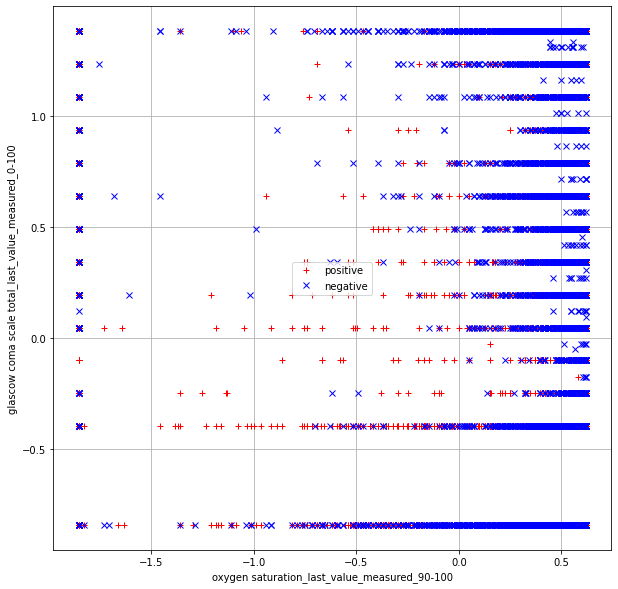

In [5]:
f, axs = plt.subplots(1, 1, figsize=(10, 10))
scaler = StandardScaler()
x_train_tr = scaler.fit_transform(x_train[:, list(top_coeffs_inds)])

x_neg_ND = x_train_tr[y_train==0]
x_pos_ND = x_train_tr[y_train==1]
axs.plot(x_pos_ND[:,0], x_pos_ND[:,1], 'r+', label='positive')
axs.plot(x_neg_ND[:,0], x_neg_ND[:,1], 'bx', label='negative')
axs.grid(True)
axs.legend()
axs.set_xlabel(most_important_features[0])
axs.set_ylabel(most_important_features[1])
# axs.set_ylim([0, 3])
plt.show()
# axs.set_xlim([-3, 3])

In [6]:
scaler.mean_.shape

(2,)

In [15]:
def calc_cross_entropy_loss(w_D):  
    ry_N = np.sign(y_train-0.01)*(np.dot(x_train_tr, w_D[:2]) + w_D[2])
    cross_ent = np.sum(np.log(ag_expit(ry_N)+1e-15))# add 1e-15 to avoid precision problems
    return -1.0*cross_ent

def calc_decision_score(x, w):
    return np.dot(x, w[:2]) + w[2]

def pretty_plot_of_decision_boundary(
        w_D, level_grid = [-1.0, 0.0, 1.0],
        G=51, H=51, figsize=(3,3),
        x1_lims=(-2, 6), x2_lims=(-2, 6), title_str='', thresh=0.0): 


    redblue_colors = plt.cm.RdBu(np.linspace(0, 1, 101))
    redblue_cmap = matplotlib.colors.ListedColormap(redblue_colors)
    redblue_cmap_r = matplotlib.colors.ListedColormap(redblue_cmap.colors[::-1])
    
    fig, ax_h = plt.subplots(figsize=figsize)
    sns.set_context("notebook", font_scale=1.5)
    divider = make_axes_locatable(ax_h)
    cax = divider.append_axes('right', size='5%', pad=0.2)
    ax_h.set_xlim(x1_lims)
    ax_h.set_ylim(x2_lims)

    ax_h.plot(x_neg_ND[:,0], x_neg_ND[:,1], 'x', color=redblue_colors[-1])
    ax_h.plot(x_pos_ND[:,0], x_pos_ND[:,1], '+', color=redblue_colors[0])
    ax_h.set_xlabel(r'$x_1$')
    ax_h.set_ylabel(r'$x_2$')
    w_str = ' '.join(['% .2f' % a for a in w_D])
    
    x0_G = np.linspace(*ax_h.get_xlim(), num=G)
    x1_H = np.linspace(*ax_h.get_ylim(), num=H)
    G = x0_G.size
    H = x1_H.size
    
    # J = G * H
    X0_HG, X1_HG = np.meshgrid(x0_G, x1_H)
    assert X0_HG.shape == (H, G)
    x_JD = np.hstack([X0_HG.flatten()[:,np.newaxis], X1_HG.flatten()[:,np.newaxis]])
    assert np.allclose(X0_HG, x_JD[:,0].reshape((H,G)))
    
    z_J = calc_decision_score(x_JD, w_D)
    Z_HG = z_J.reshape((H,G))

    B_HG = 2.0 * (Z_HG > 0) - 1.0
    
    L = np.maximum(len(level_grid), 11)
    level_colors = plt.cm.Greys(np.linspace(0, 1, L))

    # Get grays in the middle range
    m = L // 2
    nrem = len(level_grid)
    mlow = m - nrem // 2
    mhigh = m + nrem // 2 + 1
    if mhigh - mlow < len(level_grid):
        mhigh += 1
    print(mlow, mhigh, L)
    level_cmap = matplotlib.colors.ListedColormap(level_colors[mlow:mhigh])
        
    ax_h.contour(
        X0_HG, X1_HG, Z_HG,
        levels=level_grid,
        cmap=level_cmap,
        vmin=-5, vmax=+5);
    im = ax_h.pcolormesh(
        X0_HG, X1_HG, ag_expit(Z_HG),
        alpha=1.0, linewidth=0,
        cmap=redblue_cmap_r,
        edgecolor='face', vmin=0.0, vmax=1.0);
    #im.set_edgecolor((1.0, 1.0, 1.0, 0.001))
    im.set_linewidth(0.0)
    im.set_alpha(0.25)

    cbar = plt.colorbar(im, cax=cax, ticks=[0, 0.2, 0.4, 0.6, 0.8])
    cbar.set_alpha(0.25)
    cbar.draw_all()

    z_N = calc_decision_score(x_train_tr, w_D)
    yhat_N = np.float64(z_N >= thresh)
    TP = np.sum(np.logical_and(y_train == 1, yhat_N == 1))
    FP = np.sum(np.logical_and(y_train == 0, yhat_N == 1))
    TN = np.sum(np.logical_and(y_train == 0, yhat_N == 0))
    FN = np.sum(np.logical_and(y_train == 1, yhat_N == 0))
    precision = TP / (1e-10 + float(TP+FP))
    recall = TP / (1e-10 + float(TP + FN))

    ax_h.set_title("%s\n Prec:%.3f  Rec:%.3f  CE:% .1f\n" % (
        title_str, precision, recall, calc_cross_entropy_loss(w_D)))
    ax_h.set_xticks(np.linspace(x1_lims[0], x1_lims[1]), 10)
    ax_h.set_yticks(np.linspace(x2_lims[0], x2_lims[1]), 10)
    
    
    #print("w_D: %s" % (str(w_D)))
    for level_thr in level_grid:
        # Assess each training point at this level
        z_N = calc_decision_score(x_train_tr, w_D)
        yhat_N = np.float64(z_N >= level_thr)
        TP = np.sum(np.logical_and(y_train == 1, yhat_N == 1))
        FP = np.sum(np.logical_and(y_train == 0, yhat_N == 1))
        TN = np.sum(np.logical_and(y_train == 0, yhat_N == 0))
        FN = np.sum(np.logical_and(y_train == 1, yhat_N == 0))
        precision = TP / (1e-10 + float(TP+FP))
        recall = TP / (1e-10 + float(TP + FN))
        print("thr % 6.3f | cross_entropy %.3f | precision %.3f | recall %.3f | TP %5d | FP %5d | TN %5d | FN %5d" % (
            level_thr, 
            calc_cross_entropy_loss(w_D),
            precision, recall, TP, FP, TN, FN))

        
def calc_precision_recall(w_D):
    z_N = calc_decision_score(x_train_tr, w_D)
    yhat_N = np.float64(z_N >= 0.0)
    TP = np.sum(np.logical_and(y_train == 1, yhat_N == 1))
    FP = np.sum(np.logical_and(y_train == 0, yhat_N == 1))
    TN = np.sum(np.logical_and(y_train == 0, yhat_N == 0))
    FN = np.sum(np.logical_and(y_train == 1, yhat_N == 0))
    precision = TP / (1e-10 + float(TP+FP))
    recall = TP / (1e-10 + float(TP + FN))
    
    return precision, recall

5 6 11


TypeError: 'int' object is not iterable

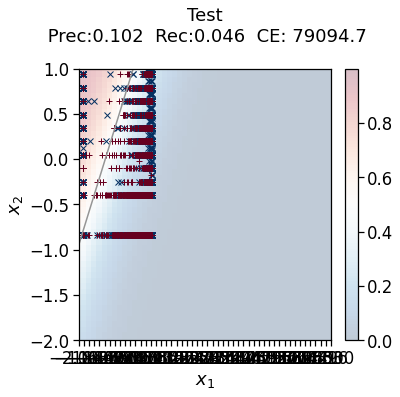

In [35]:
# w_D_90 = np.asarray([-0.9, -0.5, -0.1])


# pretty_plot_of_decision_boundary(w_D_90, level_grid = [0.0], figsize=(5,5), x1_lims=(-2.0, 1.0), 
#                                  x2_lims=(-1.0, 2.0), title_str='Test')

G=121
w1_A = np.linspace(-5, 5, G)
W1_AAA, W2_AAA, W3_AAA = np.meshgrid(w1_A, w1_A, w1_A)
params_flattened = np.hstack([W1_AAA.flatten(), W2_AAA.flatten(), W3_AAA.flatten()])
best_id = None
best_recall = -np.inf
best_w_D = None
precision_list, recall_list, w_D_list = [[], [], []]
for combo_id, combo in enumerate(zip(W1_AAA.flatten(), W2_AAA.flatten(), W3_AAA.flatten())):
    w_D = np.asarray(combo)
    precision, recall = calc_precision_recall(w_D)
    precision_list.append(precision)
    recall_list.append(recall)
    w_D_list.append(w_D)
    if precision>=0.1:
        if best_recall<recall:
            best_recall=recall
            best_precision=precision
            best_w_D = w_D

pretty_plot_of_decision_boundary(best_w_D, level_grid = [0.0],
                                 figsize=(5,5), x1_lims=(-2, 7), x2_lims=(-2, 1), title_str='Test')

In [36]:
max(precision_list)

0.11669555170421048